In [14]:
## Plots based on results from K. Nørgaard

from utils import *

from matplotlib.collections import PatchCollection
from matplotlib.patches import Patch



In [15]:
### Notes

## Very high is 14 and upwards
## High is 10.0 to 14
## The target range is: 3,9 to 10.0
## low blood glucose is less than 3.9
## Very low blood glucose is less than 3


In [16]:
files = ['run_doctor_2d/', 'run_bayesian_2d/', 'run_num_opt_2d/', 'run_rls_2d/', 'run_bayesian_2d_no_prior_callibration/']
files = ['simulations/' + x for x in files]

In [17]:
dat = load_data(files[1])

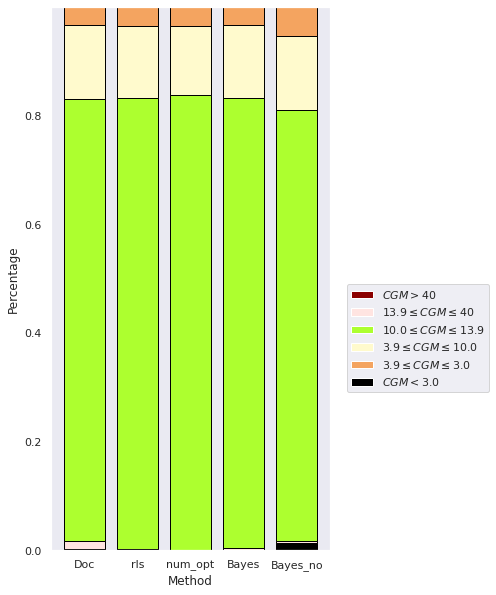

In [25]:

barWidth = 0.5
step = 0.65

plt.figure(figsize=(5,10))

x = [0 + step * i for i in range(5)]

for i,file in enumerate(files):
    dat = load_data(file)
    CGM = dat['nCGM']
    O = (CGM < 3.0)
    a = (3.0 <= CGM) & (CGM < 3.9)
    b = (3.9 <= CGM) & (CGM < 10.0)
    c = (10.0 <= CGM) & (CGM < 13.9)
    d = (13.9 <= CGM) & (CGM < 40.0)
    E = (40.0 <= CGM)

    TOTAL = (CGM != np.nan).sum()

    Obar = O.sum()/TOTAL
    abar = a.sum()/TOTAL
    bbar = b.sum()/TOTAL
    cbar = c.sum()/TOTAL
    dbar = d.sum()/TOTAL
    Ebar = E.sum()/TOTAL

    plt.bar(x[i], Obar, edgecolor = 'black', width = barWidth, color ='black')
    plt.bar(x[i], abar, bottom = Obar ,edgecolor = 'black', width = barWidth, color ='mistyrose')
    plt.bar(x[i], bbar, bottom = abar+Obar, edgecolor = 'black', width = barWidth, color ='greenyellow')
    plt.bar(x[i], cbar, bottom = bbar+abar+Obar, edgecolor = 'black', width = barWidth, color ='lemonchiffon')
    plt.bar(x[i], dbar, bottom = cbar+bbar+abar+Obar, edgecolor = 'black', width = barWidth, color ='sandybrown')
    plt.bar(x[i], Ebar, bottom = dbar + cbar+bbar+abar+Obar, width = barWidth, color ='r', edgecolor = 'darkred')


    plt.xticks(x,['Doc','rls','num_opt', 'Bayes', 'Bayes_no'])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    # plt.title(title)
    plt.grid(False)
    # Custom legend
    # 

legend_elements = [Patch(facecolor='darkred', label='$CGM > 40$'),
                    Patch(facecolor='mistyrose', label='$13.9 \leq CGM \leq 40$'),
                    Patch(facecolor='greenyellow', label='$10.0 \leq CGM \leq 13.9$'),
                    Patch(facecolor='lemonchiffon', label='$3.9 \leq CGM \leq 10.0$'),
                    Patch(facecolor='sandybrown', label='$3.9 \leq CGM \leq 3.0$'),
                    Patch(facecolor='black', label='$CGM < 3.0$')
                    ]
# Patch(facecolor='darkred', label='$G<3.0$')
plt.legend(handles=legend_elements,bbox_to_anchor=(1.04,0.5))
plt.show()

In [24]:
### Translate them to "goals"

for i,file in enumerate(files):
    dat = load_data(file)
    CGM = dat['nCGM']
    O = (CGM < 3.0)
    a = (3.0 <= CGM) & (CGM < 3.9)
    b = (3.9 <= CGM) & (CGM < 10.0)
    c = (10.0 <= CGM) & (CGM < 13.9)
    d = (13.9 <= CGM) & (CGM < 40.0)
    E = (40.0 <= CGM)

    TOTAL = (CGM != np.nan).sum()

    Obar = O.sum()/TOTAL
    abar = a.sum()/TOTAL
    bbar = b.sum()/TOTAL
    cbar = c.sum()/TOTAL
    dbar = d.sum()/TOTAL
    Ebar = E.sum()/TOTAL

    print(file)
    print(f'< 3.0: {Obar}')
    print(f'< 3.9: {abar}')
    print(f'> 3.9 < 10.0 {bbar}')
    print(f' > 10.0 {cbar + dbar + Ebar}')
    print(f' > 13.9 {dbar + Ebar}')

    print('-'*15)


simulations/run_doctor_2d/
< 3.0: 0.001773611111111111
< 3.9: 0.01583986111111111
> 3.9 < 10.0 0.812080625
 > 10.0 0.17030590277777777
 > 13.9 0.034108680555555555
---------------
simulations/run_bayesian_2d/
< 3.0: 6.88888888888889e-05
< 3.9: 0.0022327083333333335
> 3.9 < 10.0 0.8297925
 > 10.0 0.16790590277777778
 > 13.9 0.035895138888888886
---------------
simulations/run_num_opt_2d/
< 3.0: 0.0
< 3.9: 0.0
> 3.9 < 10.0 0.8376990277777778
 > 10.0 0.16230097222222223
 > 13.9 0.035649791666666666
---------------
simulations/run_rls_2d/
< 3.0: 0.00011444444444444444
< 3.9: 0.004663263888888889
> 3.9 < 10.0 0.8275159722222222
 > 10.0 0.16770631944444445
 > 13.9 0.03393708333333333
---------------
simulations/run_bayesian_2d_no_prior_callibration/
< 3.0: 0.014172291666666666
< 3.9: 0.0039254166666666665
> 3.9 < 10.0 0.7918477777777778
 > 10.0 0.19005451388888892
 > 13.9 0.054003055555555554
---------------
